## Importo librerias y el Df

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df_churn = pd.read_csv(r'Churn.csv', sep=';', decimal=',')


In [3]:
df_churn.head()

,State,Account_Length,Area_Code,Phone,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3099 non-null   object 
 1   Account_Length  3099 non-null   int64  
 2   Area_Code       3099 non-null   int64  
 3   Phone           3099 non-null   object 
 4   Intl_Plan       3099 non-null   object 
 5   Vmail_Plan      3099 non-null   object 
 6   Vmail_Message   3099 non-null   int64  
 7   Day_Mins        3099 non-null   float64
 8   Day_Calls       3099 non-null   int64  
 9   Day_Charge      3099 non-null   float64
 10  Eve_Mins        3099 non-null   float64
 11  Eve_Calls       3099 non-null   int64  
 12  Eve_Charge      3099 non-null   float64
 13  Night_Mins      3099 non-null   float64
 14  Night_Calls     3099 non-null   int64  
 15  Night_Charge    3099 non-null   float64
 16  Intl_Mins       3099 non-null   float64
 17  Intl_Calls      3099 non-null   i

In [5]:
### VER SI QUEREMOS CAMBIAR FORMATOS DE LAS VARAIBLES

In [6]:
df_churn.shape

(3099, 21)

In [7]:
## Night_Mins Night_Calls  Night_Charge tienen un min > 0 Raro revisar datos  
df_churn.describe()


,Account_Length,Area_Code,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
count,3099.00000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000
mean,101.18393,437.191029,8.074540,179.596999,100.366570,30.532043,201.024266,100.013875,17.087270,200.682995,99.971281,9.030810,10.236528,4.462407,2.764372,1.555340
std,39.85297,42.365585,13.668535,54.632572,20.081223,9.287510,50.900248,19.860313,4.326493,50.613708,19.508605,2.277665,2.782396,2.441330,0.751239,1.312804
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.00000,411.500000,0.000000,143.900000,87.000000,24.460000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.00000,415.000000,0.000000,179.300000,101.000000,30.480000,201.300000,100.000000,17.110000,201.300000,100.000000,9.060000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,510.000000,19.500000,216.000000,114.000000,36.720000,235.800000,113.500000,20.040000,235.150000,113.000000,10.580000,12.100000,6.000000,3.270000,2.000000
max,243.00000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,395.000000,175.000000,17.770000,20.000000,19.000000,5.400000,9.000000


In [8]:
# No hay nulos
df_churn.isna().sum().sum()

np.int64(0)

In [9]:
df_churn.Churn.value_counts()

Churn
False.    2652
True.      447
Name: count, dtype: int64

In [10]:
df_churn.Churn.value_counts('%')

Churn
False.    0.85576
True.     0.14424
Name: proportion, dtype: float64

In [11]:
# Transformo Churn en numeric
df_churn['Flag_churn'] = df_churn['Churn'].map({'True.': 1, 'False.': 0})


## Univariado

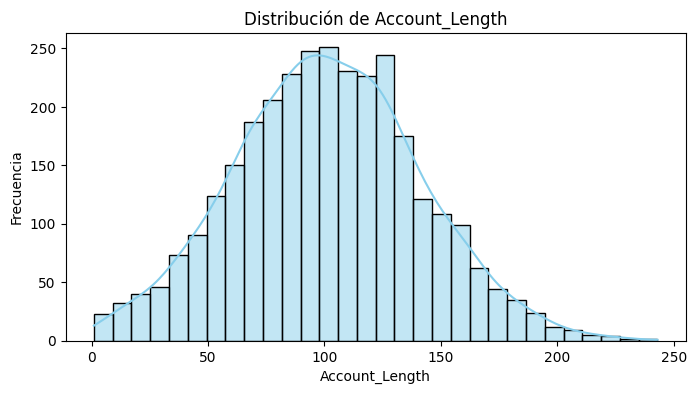

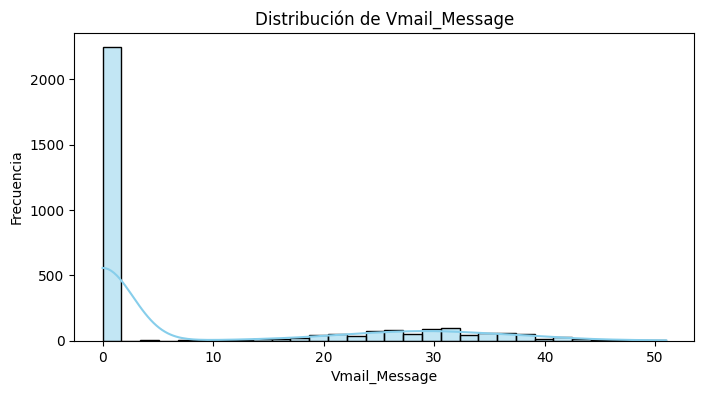

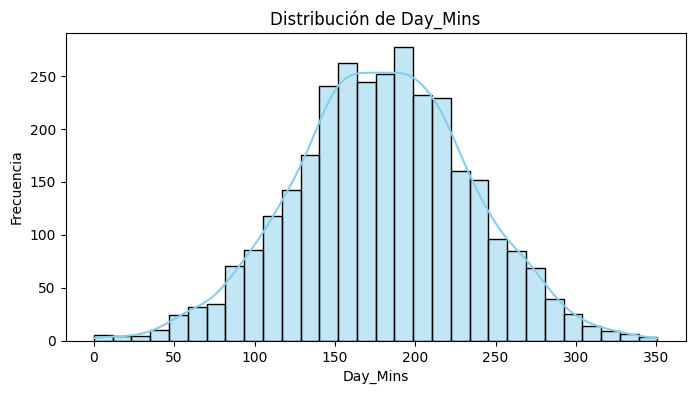

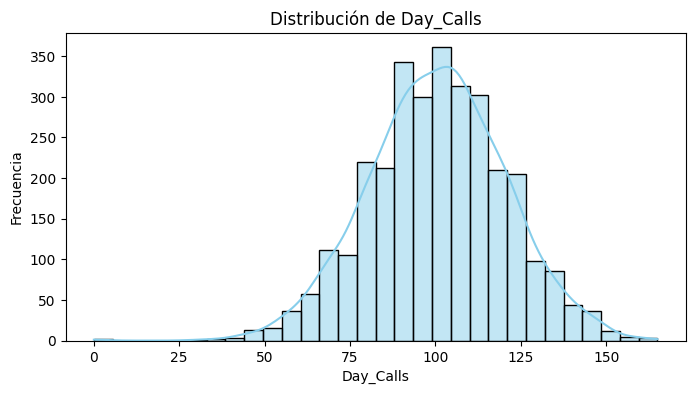

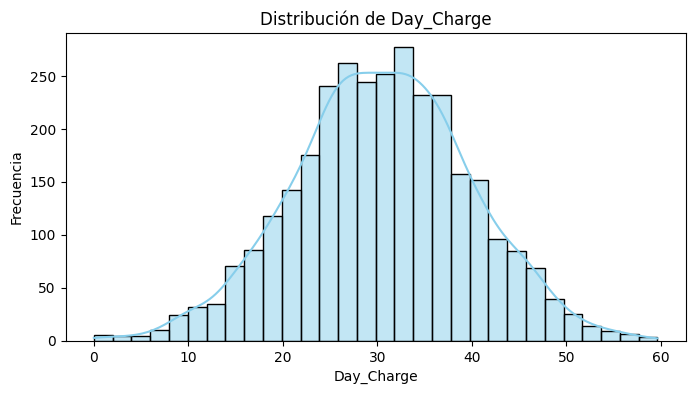

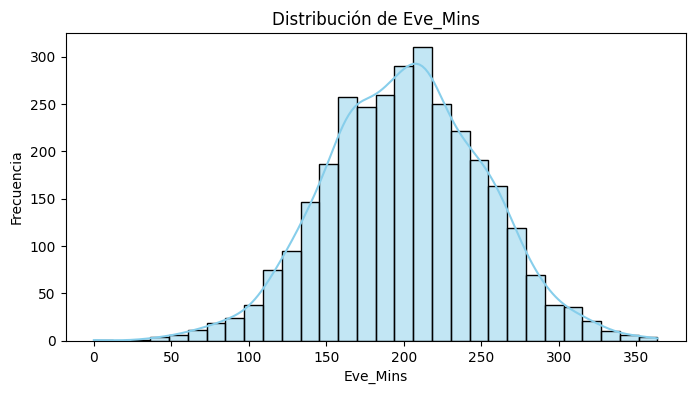

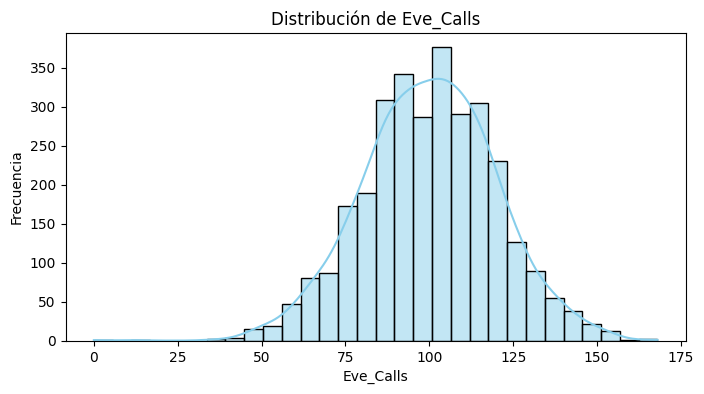

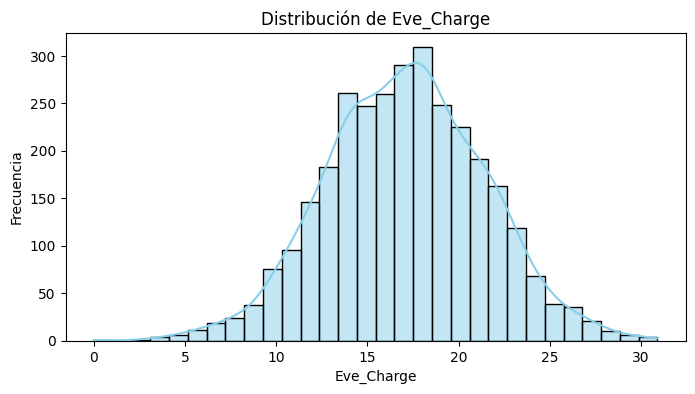

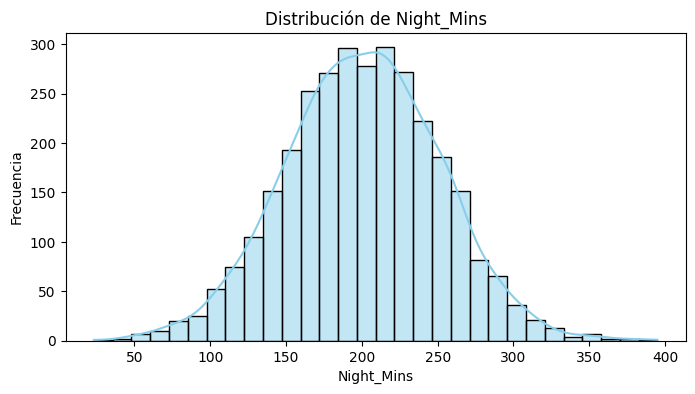

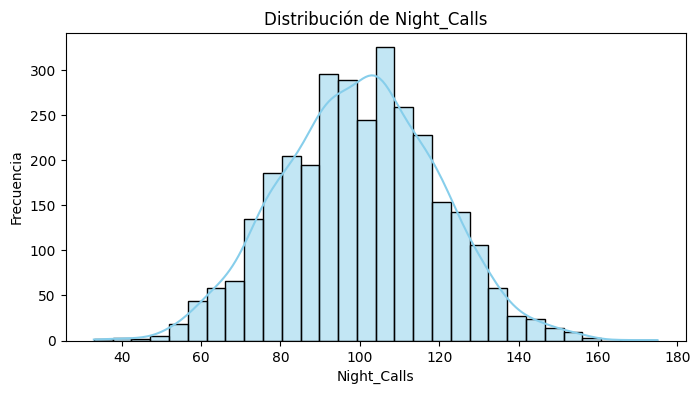

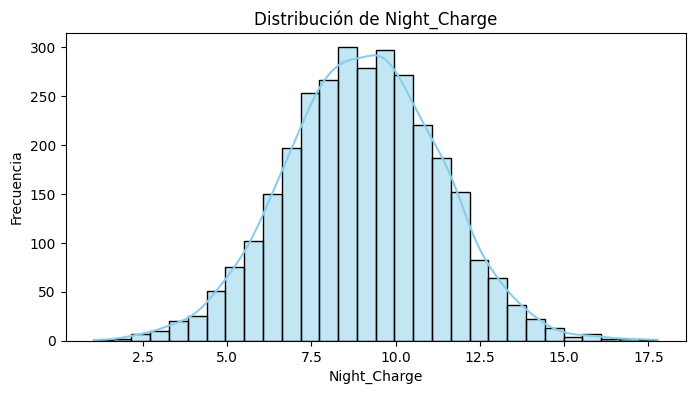

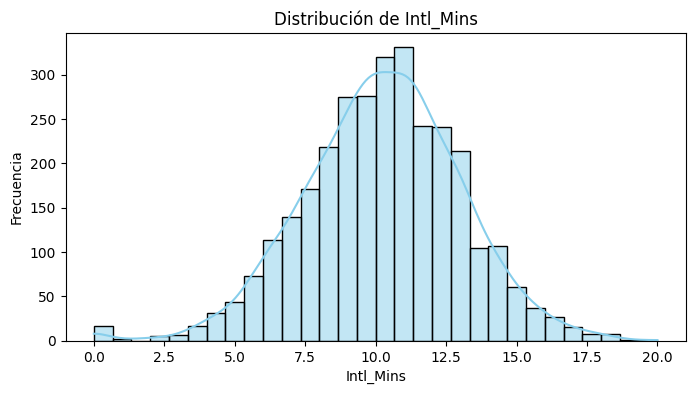

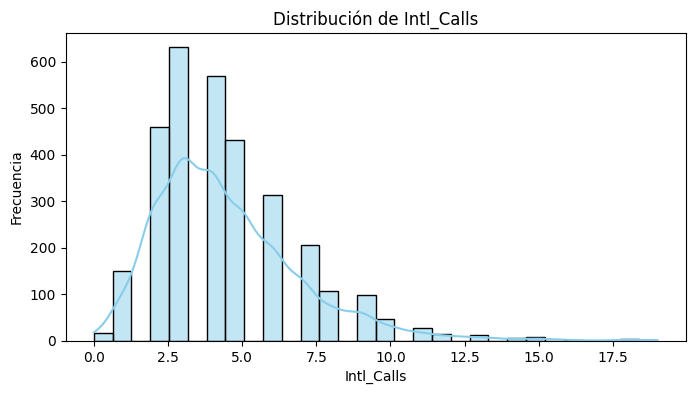

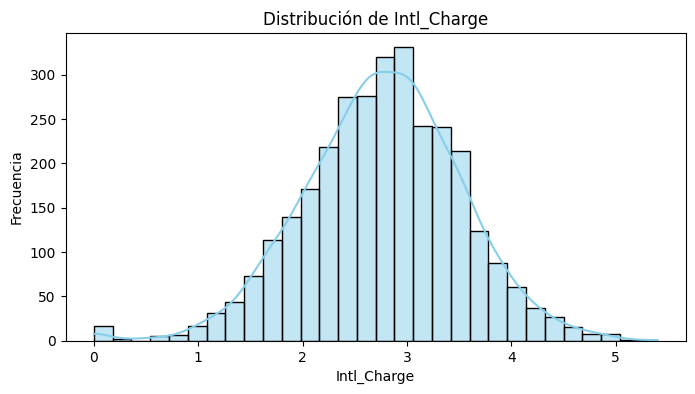

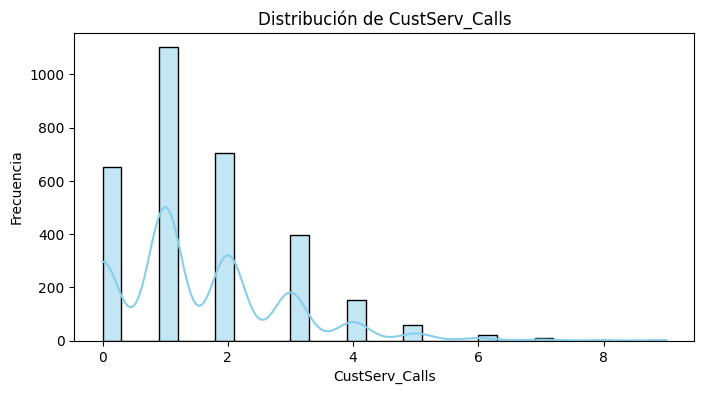

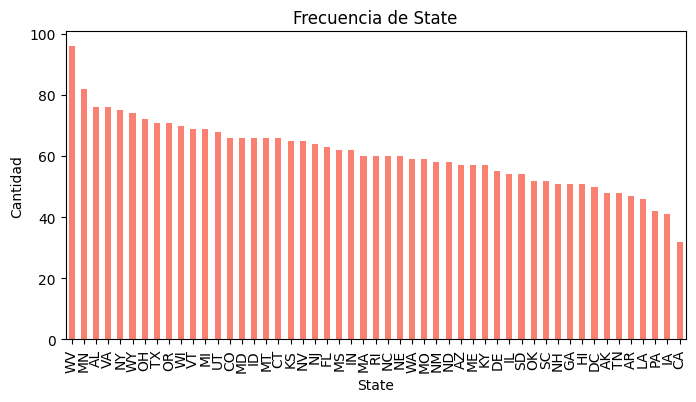

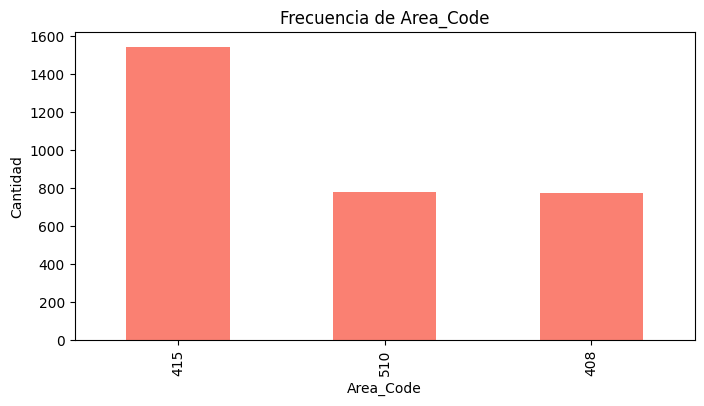

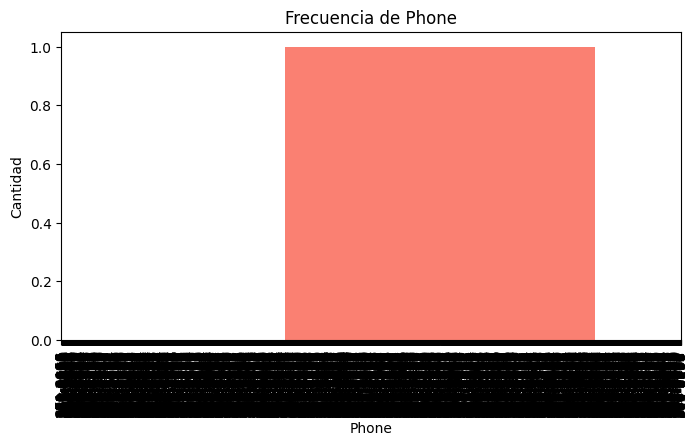

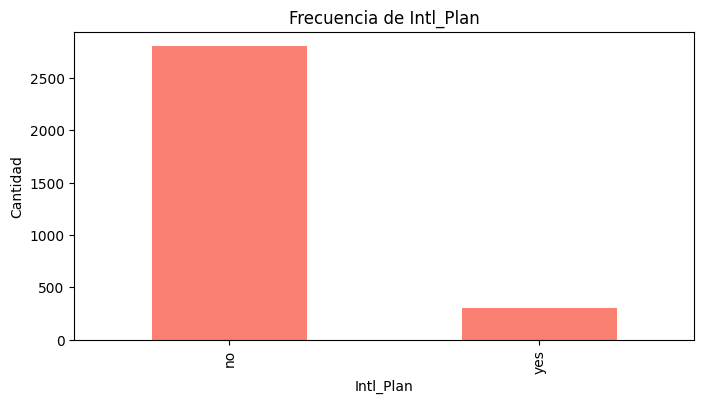

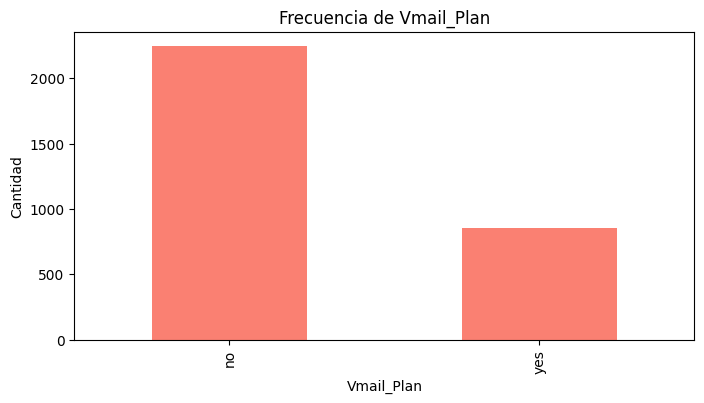

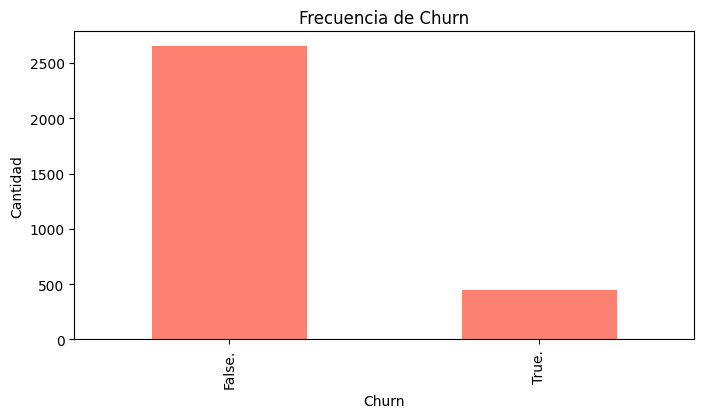

In [12]:
# Análisis univariado de las variables numéricas y categóricas
#
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas
variables_numericas = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
                       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
                       'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls']

for var in variables_numericas:
    plt.figure(figsize=(8,4))
    sns.histplot(df_churn[var], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

# Variables categóricas
variables_categoricas = ['State', 'Area_Code', 'Phone', 'Intl_Plan', 'Vmail_Plan', 'Churn']

for var in variables_categoricas:
    plt.figure(figsize=(8,4))
    df_churn[var].value_counts().plot(kind='bar', color='salmon')
    plt.title(f'Frecuencia de {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad')
    plt.show()


##Correlacion 

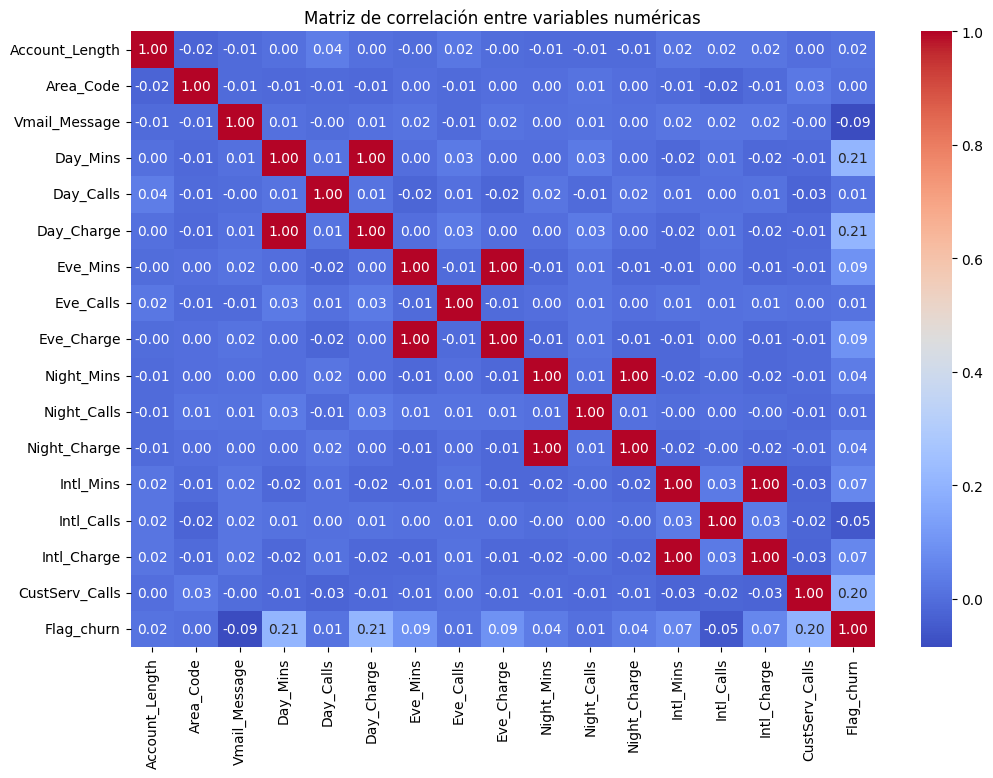

In [13]:
# Calcular y mostrar la matriz de correlación de las variables numéricas
correlacion = df_churn.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


In [14]:
# Detectar variables con correlación mayor al 90% (positiva o negativa)
umbral = 0.9
correlaciones_altas = []

# Recorremos la matriz de correlación solo por encima de la diagonal principal
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        valor_corr = correlacion.iloc[i, j]
        if abs(valor_corr) > umbral:
            correlaciones_altas.append((
                correlacion.columns[i],
                correlacion.columns[j],
                valor_corr
            ))

if correlaciones_altas:
    print("Pares de variables con correlación mayor al 90% (positiva o negativa):")
    for var1, var2, corr in correlaciones_altas:
        print(f"{var1} y {var2}: correlación = {corr:.2f}")
else:
    print("No se encontraron pares de variables con correlación mayor al 90%.")


Pares de variables con correlación mayor al 90% (positiva o negativa):
Day_Mins y Day_Charge: correlación = 1.00
Eve_Mins y Eve_Charge: correlación = 1.00
Night_Mins y Night_Charge: correlación = 1.00
Intl_Mins y Intl_Charge: correlación = 1.00


In [15]:
# Si existen pares de variables con correlación mayor al 90%, eliminamos una de cada par.
# Por simplicidad, eliminaremos la segunda variable de cada par correlacionado.

variables_a_eliminar = set()
for var1, var2, corr in correlaciones_altas:
    variables_a_eliminar.add(var2)

print("Variables a eliminar por alta correlación (>90%):", variables_a_eliminar)

# Eliminamos las variables del DataFrame
df_churn_reducido = df_churn.drop(columns=variables_a_eliminar)
print("Nuevas dimensiones del DataFrame después de eliminar variables correlacionadas:", df_churn_reducido.shape)


Variables a eliminar por alta correlación (>90%): {'Eve_Charge', 'Day_Charge', 'Night_Charge', 'Intl_Charge'}
Nuevas dimensiones del DataFrame después de eliminar variables correlacionadas: (3099, 18)


In [16]:
df_churn_reducido

,State,Account_Length,Area_Code,Phone,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,CustServ_Calls,Churn,Flag_churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,MN,91,415,382-9297,no,no,0,133.8,61,158.8,96,189.6,92,10.5,2,1,False.,0
3095,AL,181,415,330-9294,no,yes,27,190.3,93,249.0,127,215.7,82,10.6,4,1,False.,0
3096,CO,118,415,362-8763,no,yes,36,294.9,106,165.7,115,189.2,63,9.8,5,3,False.,0
3097,ME,112,415,403-4816,no,no,0,185.4,114,191.4,119,144.0,78,10.0,11,2,False.,0


## Bi Variado


Tabla de contingencia para Vmail_Plan vs Flag_churn:


Flag_churn,0,1
Vmail_Plan,,
no,0.834670,0.165330
yes,0.911111,0.088889
All,0.855760,0.144240



Tabla de contingencia para Intl_Plan vs Flag_churn:


Flag_churn,0,1
Intl_Plan,,
no,0.885357,0.114643
yes,0.578595,0.421405
All,0.855760,0.144240



Tabla de contingencia para State vs Flag_churn:


Flag_churn,0,1
State,,
AK,0.958333,0.041667
AL,0.894737,0.105263
AR,0.872340,0.127660
AZ,0.929825,0.070175
CA,0.750000,0.250000
CO,0.863636,0.136364
CT,0.833333,0.166667
DC,0.900000,0.100000
DE,0.836364,0.163636


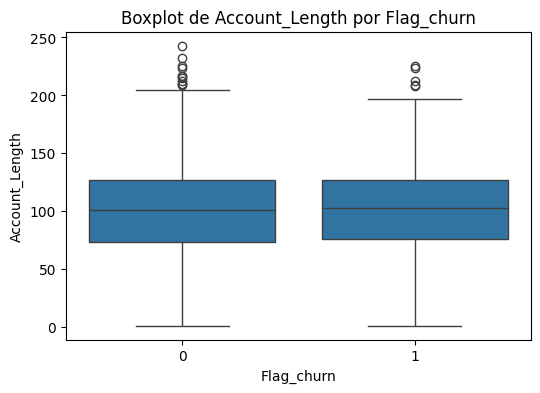

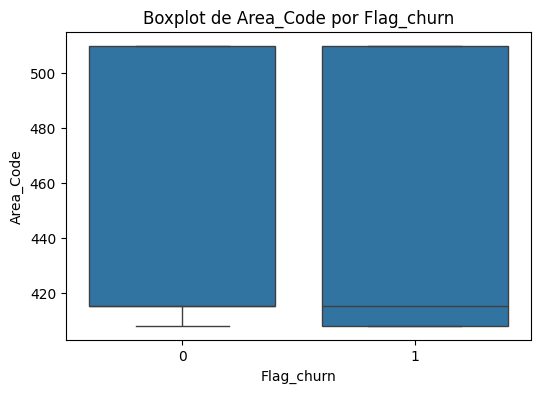

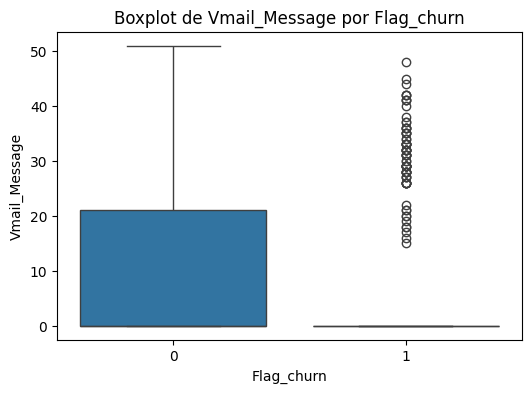

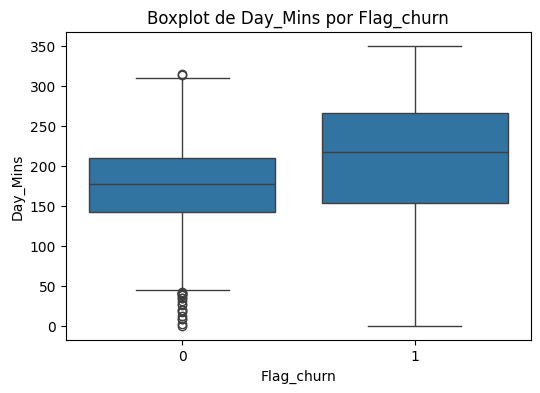

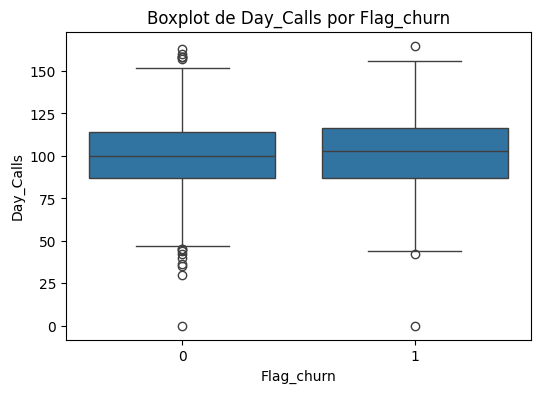

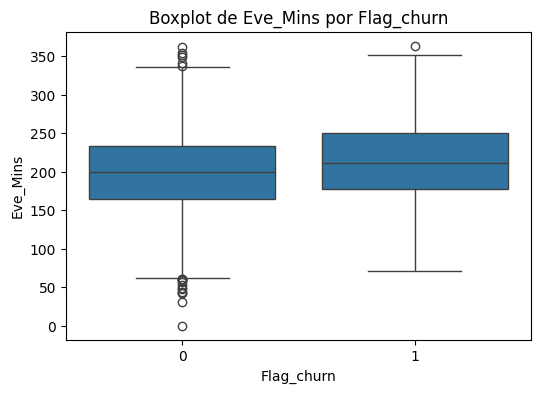

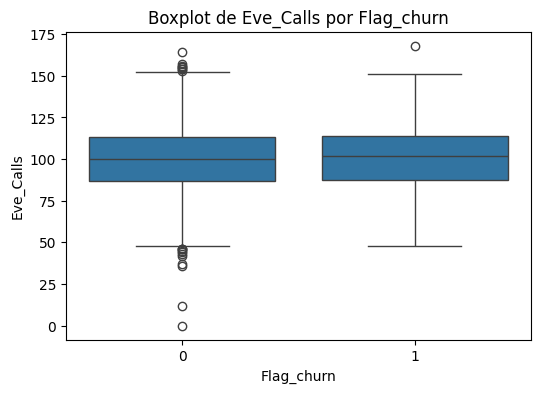

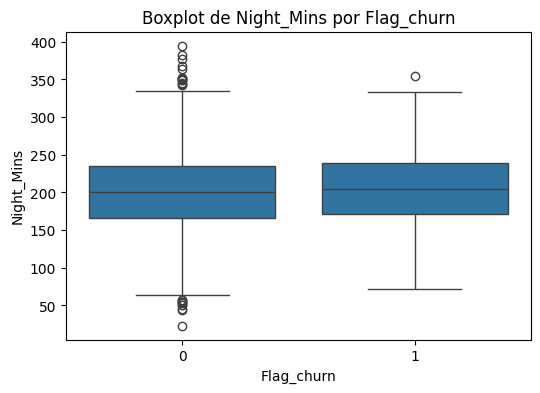

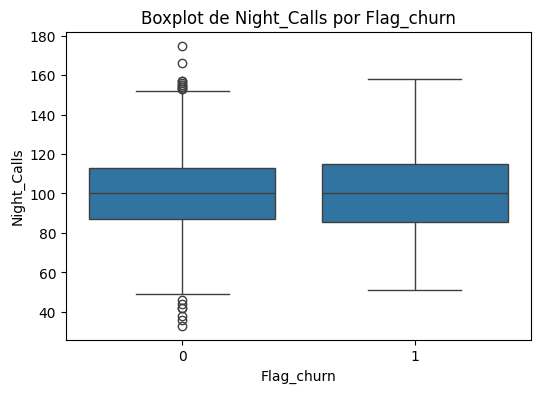

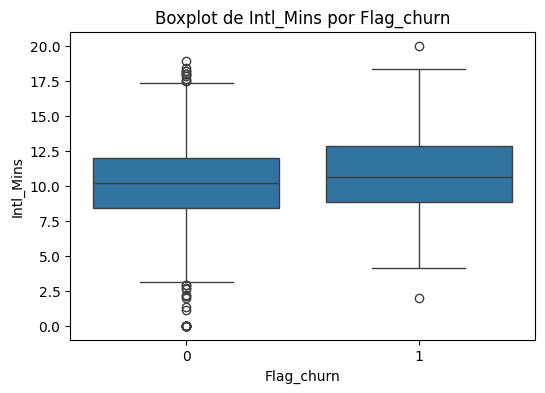

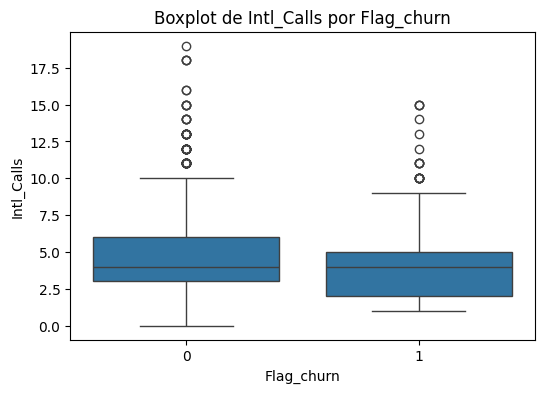

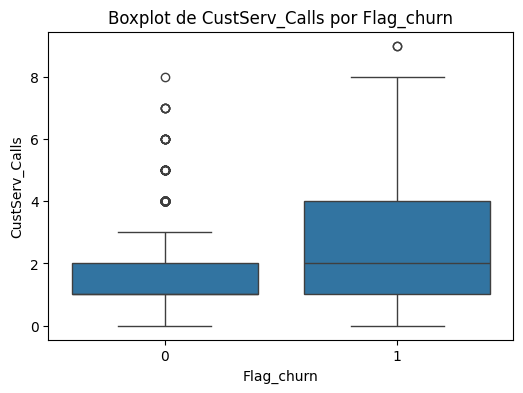

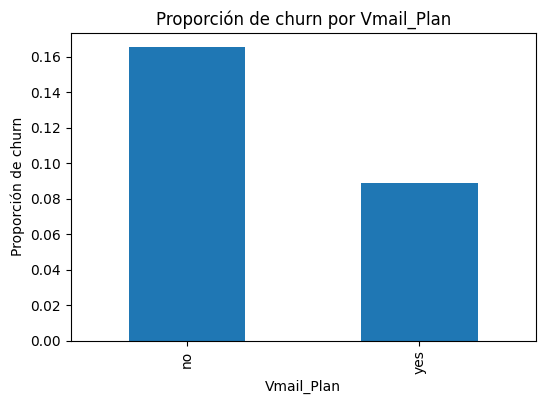

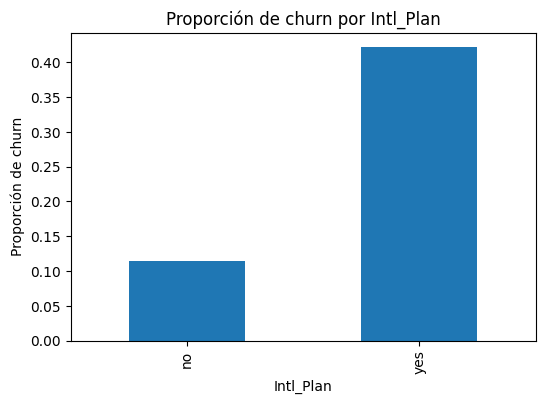

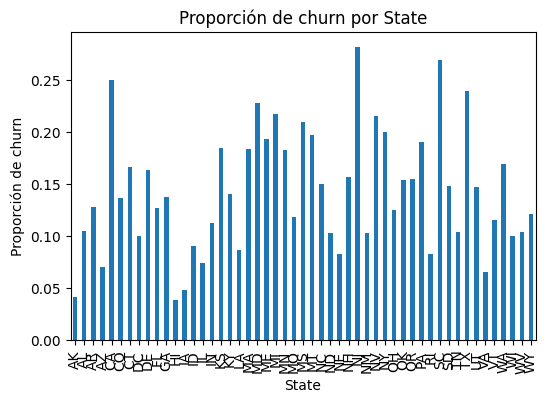


Medias de variables numéricas por Flag_churn:


,Account_Length,Area_Code,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,CustServ_Calls
Flag_churn,,,,,,,,,,,,
0,100.930995,437.118024,8.553544,174.983371,100.261689,199.086652,99.894419,199.923680,99.917798,10.160973,4.515083,1.448341
1,102.684564,437.624161,5.232662,206.969128,100.988814,212.519911,100.722595,205.187919,100.288591,10.684787,4.149888,2.190157


In [24]:
# Opción 1: Tablas de contingencia para variables categóricas vs Flag_churn
variables_categoricas = ['Vmail_Plan', 'Intl_Plan', 'State']  # Puedes agregar más si lo deseas

for var in variables_categoricas:
    print(f"\nTabla de contingencia para {var} vs Flag_churn:")
    display(pd.crosstab(df_churn_reducido[var], df_churn_reducido['Flag_churn'], margins=True, normalize='index'))

# Opción 2: Boxplots para variables numéricas vs Flag_churn
import matplotlib.pyplot as plt
import seaborn as sns

variables_numericas = df_churn_reducido.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_numericas = [v for v in variables_numericas if v != 'Flag_churn']

for var in variables_numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Flag_churn', y=var, data=df_churn_reducido)
    plt.title(f'Boxplot de {var} por Flag_churn')
    plt.show()

# Opción 3: Gráficos de barras para proporciones de churn por categoría
for var in variables_categoricas:
    prop = df_churn_reducido.groupby(var)['Flag_churn'].mean()
    prop.plot(kind='bar', figsize=(6,4))
    plt.title(f'Proporción de churn por {var}')
    plt.ylabel('Proporción de churn')
    plt.show()

# Opción 4: Tablas resumen de medias de variables numéricas por Flag_churn
print("\nMedias de variables numéricas por Flag_churn:")
display(df_churn_reducido.groupby('Flag_churn')[variables_numericas].mean())


In [18]:
df_churn_reducido.groupby('Flag_churn')['Day_Calls'].describe()

,count,mean,std,min,25%,50%,75%,max
Flag_churn,,,,,,,,
0,2652.0,100.261689,19.789370,0.0,87.0,100.0,114.0,163.0
1,447.0,100.988814,21.745622,0.0,87.0,103.0,116.5,165.0


In [19]:
df_churn_reducido.groupby(['Vmail_Plan', 'Intl_Plan',]).agg({'Flag_churn': ['mean','count']}).reset_index()

Vmail_Plan Intl_Plan Flag_churn      
                             mean count
0         no        no   0.136744  2033
1         no       yes   0.440758   211
2        yes        no   0.056063   767
3        yes       yes   0.375000    88

In [20]:
df_churn_reducido

,State,Account_Length,Area_Code,Phone,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,...,Vmail_Message_bin,Day_Mins_bin,Day_Calls_bin,Eve_Mins_bin,Eve_Calls_bin,Night_Mins_bin,Night_Calls_bin,Intl_Mins_bin,Intl_Calls_bin,CustServ_Calls_bin
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,...,"(-0.001, 25.0]","(250.22, 350.8]","(106.0, 111.0]","(188.0, 201.3]","(95.0, 100.0]","(243.6, 263.9]","(90.0, 95.0]","(9.7, 10.3]","(2.0, 3.0]","(-0.001, 1.0]"
1,OH,107,415,371-7191,no,yes,26,161.6,123,195.5,...,"(25.0, 32.0]","(151.1, 165.7]","(117.0, 125.2]","(188.0, 201.3]","(100.0, 105.0]","(243.6, 263.9]","(100.0, 105.0]","(12.5, 13.7]","(2.0, 3.0]","(-0.001, 1.0]"
2,NJ,137,415,358-1921,no,no,0,243.4,114,121.2,...,"(-0.001, 25.0]","(224.4, 250.22]","(111.0, 117.0]","(-0.001, 136.78]","(105.0, 111.0]","(158.6, 173.84]","(100.0, 105.0]","(11.6, 12.5]","(4.0, 5.0]","(-0.001, 1.0]"
3,OH,84,408,375-9999,yes,no,0,299.4,71,61.9,...,"(-0.001, 25.0]","(250.22, 350.8]","(-0.001, 74.0]","(-0.001, 136.78]","(84.0, 90.0]","(188.2, 201.3]","(83.0, 90.0]","(-0.001, 6.7]","(6.0, 8.0]","(1.0, 2.0]"
4,OK,75,415,330-6626,yes,no,0,166.7,113,148.3,...,"(-0.001, 25.0]","(165.7, 179.3]","(111.0, 117.0]","(136.78, 158.8]","(117.0, 125.0]","(173.84, 188.2]","(117.0, 125.0]","(9.7, 10.3]","(2.0, 3.0]","(2.0, 3.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,MN,91,415,382-9297,no,no,0,133.8,61,158.8,...,"(-0.001, 25.0]","(109.88, 134.76]","(-0.001, 74.0]","(136.78, 158.8]","(95.0, 100.0]","(188.2, 201.3]","(90.0, 95.0]","(10.3, 11.0]","(-0.001, 2.0]","(-0.001, 1.0]"
3095,AL,181,415,330-9294,no,yes,27,190.3,93,249.0,...,"(25.0, 32.0]","(179.3, 193.98]","(90.0, 95.0]","(244.78, 265.8]","(125.0, 168.0]","(214.0, 227.4]","(75.0, 83.0]","(10.3, 11.0]","(3.0, 4.0]","(-0.001, 1.0]"
3096,CO,118,415,362-8763,no,yes,36,294.9,106,165.7,...,"(32.0, 51.0]","(250.22, 350.8]","(101.0, 106.0]","(158.8, 173.04]","(111.0, 117.0]","(188.2, 201.3]","(32.999, 75.0]","(9.7, 10.3]","(4.0, 5.0]","(2.0, 3.0]"
3097,ME,112,415,403-4816,no,no,0,185.4,114,191.4,...,"(-0.001, 25.0]","(179.3, 193.98]","(111.0, 117.0]","(188.0, 201.3]","(117.0, 125.0]","(136.0, 158.6]","(75.0, 83.0]","(9.7, 10.3]","(8.0, 19.0]","(1.0, 2.0]"


## Deteccion de anomalias

In [25]:
# Vamos a detectar y eliminar outliers usando el método del rango intercuartílico (IQR) para las variables numéricas

# Seleccionamos las variables numéricas (excluyendo la variable objetivo)
variables_numericas = df_churn_reducido.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_numericas = [v for v in variables_numericas if v != 'Flag_churn']

# Creamos una copia del dataframe para trabajar
df_sin_outliers = df_churn_reducido.copy()

for var in variables_numericas:
    Q1 = df_sin_outliers[var].quantile(0.25)
    Q3 = df_sin_outliers[var].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    # Filtramos los outliers
    df_sin_outliers = df_sin_outliers[(df_sin_outliers[var] >= limite_inferior) & (df_sin_outliers[var] <= limite_superior)]

print(f"Filas originales: {df_churn_reducido.shape[0]}")
print(f"Filas después de eliminar outliers: {df_sin_outliers.shape[0]}")

# Si quieres que el dataframe principal sea el que no tiene outliers, puedes reasignar:
# df_churn_reducido = df_sin_outliers.reset_index(drop=True)


Filas originales: 3099
Filas después de eliminar outliers: 2614


## Split - Metodo Holdout (70 % Train - 30 % Test)

In [21]:

# Supongamos que la variable objetivo es 'Flag_churn' y el resto son features
X = df_churn_reducido.drop('Flag_churn', axis=1)
y = df_churn_reducido['Flag_churn']

# Realizamos el split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (2169, 28), Test shape: (930, 28)


In [22]:
X_train

,State,Account_Length,Area_Code,Phone,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,...,Vmail_Message_bin,Day_Mins_bin,Day_Calls_bin,Eve_Mins_bin,Eve_Calls_bin,Night_Mins_bin,Night_Calls_bin,Intl_Mins_bin,Intl_Calls_bin,CustServ_Calls_bin
1998,AR,85,415,380-3974,no,no,0,96.7,97,193.8,...,"(-0.001, 25.0]","(-0.001, 109.88]","(95.0, 101.0]","(188.0, 201.3]","(90.0, 95.0]","(158.6, 173.84]","(83.0, 90.0]","(8.9, 9.7]","(2.0, 3.0]","(1.0, 2.0]"
274,PA,92,408,339-9631,no,yes,28,151.1,90,194.8,...,"(25.0, 32.0]","(134.76, 151.1]","(84.0, 90.0]","(188.0, 201.3]","(75.0, 84.0]","(227.4, 243.6]","(110.0, 117.0]","(9.7, 10.3]","(2.0, 3.0]","(-0.001, 1.0]"
570,DE,51,510,406-2454,no,no,0,181.5,108,196.9,...,"(-0.001, 25.0]","(179.3, 193.98]","(106.0, 111.0]","(188.0, 201.3]","(84.0, 90.0]","(173.84, 188.2]","(117.0, 125.0]","(9.7, 10.3]","(-0.001, 2.0]","(-0.001, 1.0]"
1846,NH,120,510,395-2579,no,yes,43,177.9,117,175.1,...,"(32.0, 51.0]","(165.7, 179.3]","(111.0, 117.0]","(173.04, 188.0]","(-0.001, 75.0]","(158.6, 173.84]","(110.0, 117.0]","(11.0, 11.6]","(3.0, 4.0]","(-0.001, 1.0]"
2126,IN,94,510,360-5794,no,no,0,245.0,112,180.4,...,"(-0.001, 25.0]","(224.4, 250.22]","(111.0, 117.0]","(173.04, 188.0]","(90.0, 95.0]","(243.6, 263.9]","(100.0, 105.0]","(8.9, 9.7]","(5.0, 6.0]","(-0.001, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,MN,53,415,358-3261,no,yes,24,145.7,146,220.5,...,"(-0.001, 25.0]","(134.76, 151.1]","(125.2, 165.0]","(213.68, 227.16]","(125.0, 168.0]","(243.6, 263.9]","(95.0, 100.0]","(12.5, 13.7]","(4.0, 5.0]","(2.0, 3.0]"
2804,LA,27,408,348-7556,no,no,0,82.6,105,204.0,...,"(-0.001, 25.0]","(-0.001, 109.88]","(101.0, 106.0]","(201.3, 213.68]","(95.0, 100.0]","(214.0, 227.4]","(117.0, 125.0]","(8.9, 9.7]","(3.0, 4.0]","(-0.001, 1.0]"
167,DC,148,415,329-9364,no,no,0,202.0,102,243.2,...,"(-0.001, 25.0]","(193.98, 208.3]","(101.0, 106.0]","(227.16, 244.78]","(125.0, 168.0]","(243.6, 263.9]","(83.0, 90.0]","(10.3, 11.0]","(2.0, 3.0]","(-0.001, 1.0]"
660,MT,109,408,405-4920,no,no,0,264.7,69,305.0,...,"(-0.001, 25.0]","(250.22, 350.8]","(-0.001, 74.0]","(265.8, 363.7]","(117.0, 125.0]","(188.2, 201.3]","(83.0, 90.0]","(8.9, 9.7]","(8.0, 19.0]","(-0.001, 1.0]"
